# TEXT MINING ASSIGNMENT

### Dataset: Musical_instruments_reviews.csv

In [28]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [29]:
# loading dataset
review = pd.read_csv('C:/Users/Hi/Downloads/Musical_instruments_reviews.csv')

## Data Preprocessing for Sentiment Analysis

In [30]:
review.shape

(10261, 9)

In [31]:
review.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [32]:
# Renaming columns for ease of reference
review = review.rename({'reviewerID':'review_id', 'reviewerName':'review_name', 'reviewText':'review_text', 
               'unixReviewTime':'unix_review_time', 'reviewTime':'review_time'}, axis = 1)
review.head()


,review_id,asin,review_name,helpful,review_text,overall,summary,unix_review_time,review_time
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [33]:
# Checking for NA values
review.isna().sum()

review_id            0
asin                 0
review_name         27
helpful              0
review_text          7
overall              0
summary              0
unix_review_time     0
review_time          0
dtype: int64

In [35]:
review['review_text'] = review['review_text'].fillna('Missing')

In [37]:
# Concatinating review_text and summary
review['reviews'] = review['review_text'] + review['summary']

# Dropping review_text and summary

review = review.drop(['review_text', 'summary'], axis = 1)

review.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,review_time,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [18]:
import pandas
import pandasql
from pandasql import sqldf
# Converting the data to a sql query for easier data handling
sqldf('Select * from review')

,Unnamed: 0,UserId,rating,Edited,reviews,date,time,day,year
0,0,Savvanananahhh,4,0,For the most part I quite enjoy Snapchat it’s ...,10/4/20 6:01,6:01,10/4/20,10/4/20
1,1,Idek 9-101112,3,0,"I’m sorry to say it, but something is definite...",10/14/20 2:13,2:13,10/14/20,10/14/20
2,2,William Quintana,3,0,Snapchat update ruined my story organization! ...,7/31/20 19:54,19:54,7/31/20,7/31/20
3,3,an gonna be unkown😏,5,0,I really love the app for how long i have been...,4/22/21 14:10,14:10,4/22/21,4/22/21
4,4,gzhangziqi,1,0,This is super frustrating. I was in the middle...,10/2/20 13:58,13:58,10/2/20,10/2/20
...,...,...,...,...,...,...,...,...,...
9555,9555,geekygirl17,1,0,I used to love using Snapchat and now I hardly...,6/24/19 0:58,0:58,6/24/19,6/24/19
9556,9556,changemaker kkdd,2,0,"Well, I did deleted it because there was some ...",6/23/19 13:42,13:42,6/23/19,6/23/19
9557,9557,teekay2much,4,0,Every time I upload a photo or video to my sto...,6/3/19 3:35,3:35,6/3/19,6/3/19
9558,9558,whoratheexplora,4,0,"Love this app, but since he update I can’t upl...",6/3/19 3:26,3:26,6/3/19,6/3/19


In [38]:
# Handling review_time column
'''Here we have an unusual review time column which has date and year, once we split both we will split the date 
further into month and date '''

# new data frame which has date and year
new = review["review_time"].str.split(",", n = 1, expand = True) 
  
# making separate date column from new data frame 
review["date"]= new[0] 
  
# making separate year column from new data frame 
review["year"]= new[1] 

review=review.drop(['review_time'], axis=1)
review.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,reviews,date,year
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",02 28,2014
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,03 16,2013
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,08 28,2013
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,02 14,2014
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,02 21,2014


In [21]:
Below_average = sqldf('Select COUNT(rating) as Less_than_3 from review where rating < 3')
Above_average = sqldf('Select COUNT(rating) as More_than_3 from review where rating >= 3')
print('Below Average {} \n Above Average {}'.format(Below_average,Above_average))

Below Average    Less_than_3
0         3111 
 Above Average    More_than_3
0         6449


In [39]:
# Splitting the date 
new1 = review["date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
review["month"]= new1[0] 
  
# adding day to the main dataset 
review["day"]= new1[1] 

review=review.drop(['date'], axis=1)
review.head()

,review_id,asin,review_name,helpful,overall,unix_review_time,reviews,year,month,day
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"Not much to write about here, but it does exac...",2014,02,28
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,The product does exactly as it should and is q...,2013,03,16
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,The primary job of this device is to block the...,2013,08,28
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,Nice windscreen protects my MXL mic and preven...,2014,02,14
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,This pop filter is great. It looks and perform...,2014,02,21


In [40]:
# Splitting the dataset based on comma and square bracket 
new1 = review["helpful"].str.split(",", n = 1, expand = True)
new2 = new1[0].str.split("[", n = 1, expand = True)
new3 = new1[1].str.split("]", n = 1, expand = True)

#Resetting the index
new2.reset_index(drop=True, inplace=True)
new3.reset_index(drop=True, inplace=True)

#Dropping empty columns due to splitting 
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

#Concatenating the splitted columns
helpful=pd.concat([new2, new3], axis=1)

In [10]:
# Splitting the date 
new1 = review["Date"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
review["month"]= new1[0] 
  
# adding day to the main dataset 
review["time"]= new1[1] 

review=review.drop(['Date'], axis=1)
review.head()

,Unnamed: 0,UserId,rating,Edited,reviews,date,month,time
0,0,Savvanananahhh,4,False,For the most part I quite enjoy Snapchat it’s ...,10/4/20 6:01,10/4/20,6:01
1,1,Idek 9-101112,3,False,"I’m sorry to say it, but something is definite...",10/14/20 2:13,10/14/20,2:13
2,2,William Quintana,3,False,Snapchat update ruined my story organization! ...,7/31/20 19:54,7/31/20,19:54
3,3,an gonna be unkown😏,5,False,I really love the app for how long i have been...,4/22/21 14:10,4/22/21,14:10
4,4,gzhangziqi,1,False,This is super frustrating. I was in the middle...,10/2/20 13:58,10/2/20,13:58


In [41]:
helpful

,1,0
0,0,0
1,13,14
2,1,1
3,0,0
4,0,0
...,...,...
10256,0,0
10257,0,0
10258,0,0
10259,0,0


In [42]:
# I found few spaces in new3, so it is better to strip all the values to find the rate
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

#Applying the function
helpful= trim_all_columns(helpful)

#Converting into integer types
helpful[0]=helpful[0].astype(str).astype(int)
helpful[1]=helpful[1].astype(str).astype(int)

'''Dividing the two columns, we have 0 in the second columns when dvided gives error, so I'm ignoring those 
#errors'''
try:
  helpful['result'] = helpful[1]/helpful[0]
except ZeroDivisionError:
  helpful['result']=0

#Filling the NaN values(created due to dividing) with 0
helpful['result'] = helpful['result'].fillna(0)

#Rounding of the results to two decimal places
helpful['result']=helpful['result'].round(2) 

#Attaching the results to a new column of the main dataframe
review['helpful_rate']=helpful['result']

#dropping the helpful column from main dataframe
review=review.drop(['helpful'], axis=1)

In [13]:
# Splitting the date 
new2 = review["month"].str.split(" ", n = 1, expand = True) 
  
# adding month to the main dataset 
review["month"]= new2 
  
# adding day to the main dataset 
review["day"]= new2 

# adding year to the main dataset 
review["year"]= new2 

review=review.drop(['month'], axis=1)
review.head()

,Unnamed: 0,UserId,rating,Edited,reviews,date,time,day,year
0,0,Savvanananahhh,4,False,For the most part I quite enjoy Snapchat it’s ...,10/4/20 6:01,6:01,10/4/20,10/4/20
1,1,Idek 9-101112,3,False,"I’m sorry to say it, but something is definite...",10/14/20 2:13,2:13,10/14/20,10/14/20
2,2,William Quintana,3,False,Snapchat update ruined my story organization! ...,7/31/20 19:54,19:54,7/31/20,7/31/20
3,3,an gonna be unkown😏,5,False,I really love the app for how long i have been...,4/22/21 14:10,14:10,4/22/21,4/22/21
4,4,gzhangziqi,1,False,This is super frustrating. I was in the middle...,10/2/20 13:58,13:58,10/2/20,10/2/20


In [43]:
review['helpful_rate'].value_counts()

0.00    7215
1.00    2040
0.50     266
0.67     136
0.75     111
        ... 
0.47       1
0.31       1
0.46       1
0.56       1
0.30       1
Name: helpful_rate, Length: 65, dtype: int64

## Removing the punctuations

In [44]:
#Removing unnecessary columns
review=review.drop(['review_name','unix_review_time'], axis=1)
#Creating a copy 
clean_reviews=review.copy()

In [45]:
import re

In [46]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [47]:
review['reviews'] = review['reviews'].apply(lambda x: review_cleaning(x))

In [48]:
review.head()

,review_id,asin,overall,reviews,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,not much to write about here but it does exact...,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,the product does exactly as it should and is q...,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,the primary job of this device is to block the...,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects my mxl mic and preven...,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,this pop filter is great it looks and performs...,2014,02,21,0.00


In [49]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [50]:
review['reviews'] = review['reviews'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_words)]))
review.head()

,review_id,asin,overall,reviews,year,month,day,helpful_rate
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,2014,02,28,0.00
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,2013,03,16,0.93
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,2013,08,28,1.00
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,2014,02,14,0.00
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,2014,02,21,0.00


### Calculating sentiment value for reviews

In [52]:
afinn = pd.read_csv('C:/Users/Hi/Downloads/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [53]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [54]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [55]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [56]:
# test that it works
calculate_sentiment(text = 'nice')

3

In [57]:
review['sentiment_value'] = review['reviews'].apply(calculate_sentiment)

In [58]:
review

,review_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,2014,02,28,0.00,0
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,2013,03,16,0.93,1
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,2013,08,28,1.00,-1
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,2014,02,14,0.00,4
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,2014,02,21,0.00,5
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,5.0,great expected thank allfive stars,2014,07,20,0.00,5
10257,A1RPTVW5VEOSI,B00JBIVXGC,5.0,ive thinking trying nanoweb strings but bit pu...,2014,07,2,0.00,26
10258,AWCJ12KBO5VII,B00JBIVXGC,4.0,tried coated strings past including elixirs ne...,2014,07,22,0.00,11
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,4.0,well made elixir developed taylor guitars stri...,2014,07,1,0.00,16


In [59]:
# how many words are in the sentence?
review['word_count'] = review['reviews'].str.split().apply(len)
review['word_count']

0         25
1         55
2         48
3         22
4         21
        ... 
10256      5
10257    291
10258     58
10259    153
10260     61
Name: word_count, Length: 10261, dtype: int64

In [60]:
review.sort_values(by='sentiment_value')

,review_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value,word_count
6758,A3FQ9WYUHG9CD,B001OLZYUU,4.0,fender treated polish cloth soft ecru colored ...,2013,12,4,0.00,-32,349
5678,A34WEXT7SIRFE4,B000ULAP4U,2.0,cans decent back bucks theyve inflated thats r...,2012,02,3,0.64,-30,105
4112,A3M9FH2OZKYF4D,B000A2HOB6,1.0,crikey begin firstly hated fact package two st...,2013,06,23,0.50,-27,67
8812,A165EMA3YTIM6A,B004UJO41S,1.0,downgrade star returning back brookmays seller...,2012,01,3,0.09,-20,410
5191,A1S0HTDO0P4N5V,B000NJ2TIE,5.0,okay well lied subject line bad singers sound ...,2013,08,12,1.00,-15,76
...,...,...,...,...,...,...,...,...,...,...
8500,ADH0O8UVJOT10,B0043RZ9QQ,5.0,unfamiliar voxs amplug products things amazing...,2012,10,24,1.00,78,501
6576,A20JJ8634DG3FS,B001I8ITQA,5.0,comparisons compared side side following pedal...,2013,08,21,1.00,99,1129
5973,A1LCG14GZJI5LO,B000Y7Q2C4,5.0,love capo let tell capo journey ive used every...,2014,05,30,1.00,106,637
8636,A35YS5ND3K5FN,B004ISK48S,5.0,constructionthis amp certainly looks sharp not...,2011,02,10,0.99,130,719


In [61]:
# Maximum sentiment value
review['sentiment_value'].max()

138

In [62]:
# review which is having max sentiment value
review[review['sentiment_value']==139]


,review_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value,word_count


In [63]:
# Full review at index 412
review['reviews'][412]

'greg abrams review entitled but tone snobs review down products pagealright want get good if somewhat basic distortion sound less deali strongly disagree find much better distortions less even near mark currently priced ative played guitar years like many people one first pedal purchases afterall everyone talks theyre available given music store nation hear famous musicians using plus actually pretty cheap snapped one like everyone else come find something popular doesnt always mean good see nickelback transformers movie franchise kardashian family etcso plugged didnt really care distortion harsh thin artificial sounding always noisy tried amps practic amp solid state fender frontman big amp tube halfstack not diverse basic sound not likeable ive read japanese made better sound newer made taiwan models but either way not great pedal mindbut like many newer players didnt know better time fast forward years ive bought sold literally dozens pedals whole world great tones found if keep ey

In [64]:
# minimum sentiment value
review['sentiment_value'].min()

-32

In [65]:
# review which is having min sentiment value
review[review['sentiment_value']==-35]

,review_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value,word_count


In [66]:
# Full review at index 6758
review['reviews'][6758]

'fender treated polish cloth soft ecru colored cloth cut scalloped edge around asimple product classic fender logo left upper quadrant cloth resealableplastic bag cloth came label read states size inchesby incheswell size measured actually inches inches wanted mention itbecause seen people get mighty upset things like no problem inch minor detail go lumber yard time look wontactually find actual theyve shrinking yearsi not sure cloth treated but not feel different untreatedgibson polishing cloths purchased also gave nose test thought might hintof whiff polish something nope no scent no whiffwhat find disconcerting warning product details section amazon web page isthe fourth bullet down california residents click proposition warning thewarning verbatim amazon kudos amazon posting warning californias proposition entitles california consumers special warnings products contain chemicals known state california cause cancer birth defects reproductive harm if products expose consumers chemica

In [67]:
# Sentiment score of the whole review
review['sentiment_value'].describe()

count    10261.000000
mean         6.955657
std          8.038375
min        -32.000000
25%          2.000000
50%          6.000000
75%         10.000000
max        138.000000
Name: sentiment_value, dtype: float64

In [68]:
# Sentiment score of the whole review
review[review['sentiment_value']<=0]

,review_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value,word_count
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,2014,02,28,0.0,0,25
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,2013,08,28,1.0,-1,48
7,AJNFQI3YR6XJ5,B00004Y2UT,3.0,use cable run output pedal chain input fender ...,2012,11,16,0.0,0,87
12,A2NIT6BKW11XJQ,B00005ML71,3.0,if not use using large sustaining pedal playin...,2013,11,17,0.0,0,16
28,A2CCGGDGZ694CT,B000068NVI,4.0,hosa xlr cables affordable heavily madei large...,2012,07,11,1.0,-2,29
...,...,...,...,...,...,...,...,...,...,...
10178,A768OB1LNE356,B00FXKIG5I,2.0,larger ones sometimes neck snap thought might ...,2014,03,22,0.5,-5,44
10181,AYTKUTAP0VA53,B00FXKIG5I,5.0,thing tiny not breakable swivel head original ...,2014,02,9,0.0,0,12
10188,A3M1PLEYNDEYO8,B00GTSM8FW,5.0,several capos but first adjustable tension sev...,2014,04,29,0.0,-5,72
10222,A2FY8306QHI5LE,B00IZCSW3M,4.0,twice price standard strings daddario nyxl str...,2014,06,21,0.0,0,40


In [69]:
review[review['sentiment_value']>=100]

,review_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value,word_count
412,A27L5L6I7OSV5B,B0002CZV82,2.0,greg abrams review entitled but tone snobs rev...,2011,06,30,0.95,138,713
5973,A1LCG14GZJI5LO,B000Y7Q2C4,5.0,love capo let tell capo journey ive used every...,2014,05,30,1.00,106,637
8636,A35YS5ND3K5FN,B004ISK48S,5.0,constructionthis amp certainly looks sharp not...,2011,02,10,0.99,130,719


C:\Users\Hi\anaconda3ab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

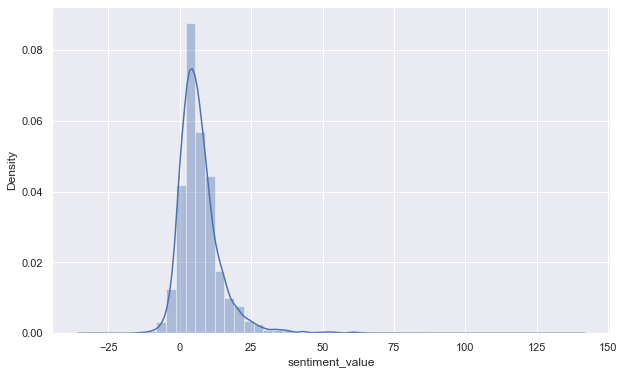

In [70]:
# Checking the distribution of reviews 

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(review['sentiment_value'])

In [73]:
review['index']=range(0,len(review))

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

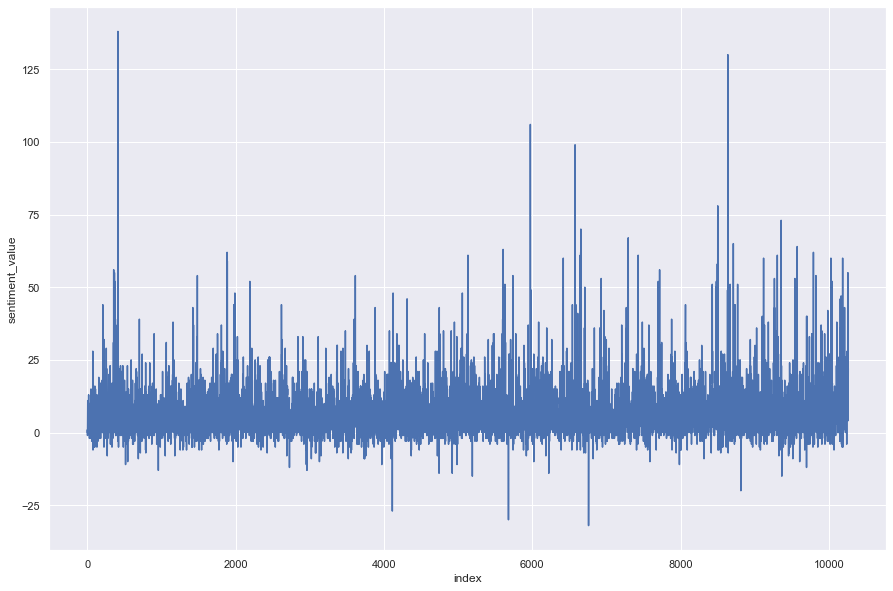

In [74]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=review)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

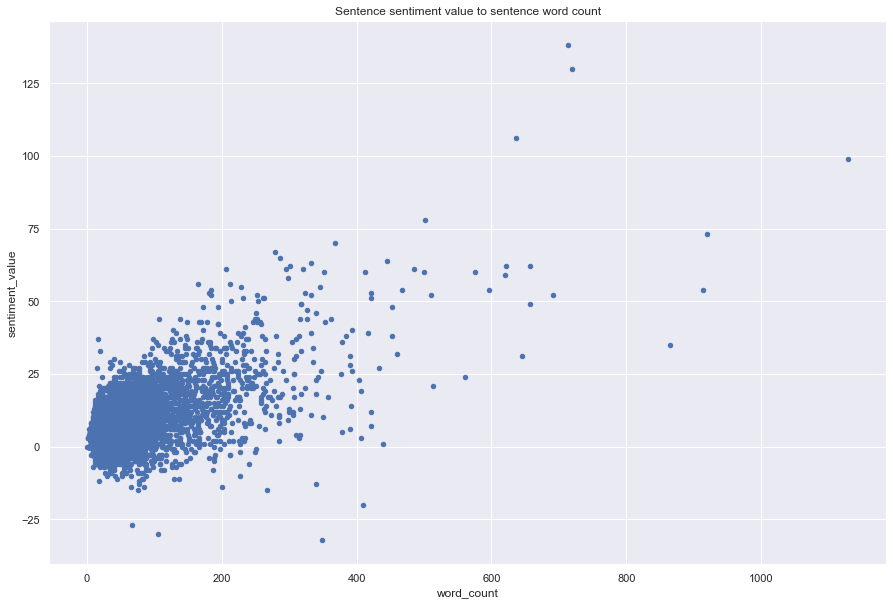

In [75]:
review.plot.scatter(x='word_count', y='sentiment_value', figsize=(15,10), title='Sentence sentiment value to sentence word count')

In [76]:
# This function will return sentiment category based on values in sentiment_value column

def sentiment_cat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['sentiment_value'] < 0:
        val = 'Negative'
    elif row['sentiment_value'] == 0: 
        val = 'Neutral'
    elif row['sentiment_value'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [77]:
#Applying the function in our new column
review['sentiment_category'] = review.apply(sentiment_cat, axis=1)
review.head()

,review_id,asin,overall,reviews,year,month,day,helpful_rate,sentiment_value,word_count,index,sentiment_category
0,A2IBPI20UZIR0U,1384719342,5.0,not much write but exactly supposed filters po...,2014,02,28,0.00,0,25,0,Neutral
1,A14VAT5EAX3D9S,1384719342,5.0,product exactly quite affordablei not realized...,2013,03,16,0.93,1,55,1,Positive
2,A195EZSQDW3E21,1384719342,5.0,primary job device block breath would otherwis...,2013,08,28,1.00,-1,48,2,Negative
3,A2C00NNG1ZQQG2,1384719342,5.0,nice windscreen protects mxl mic prevents pops...,2014,02,14,0.00,4,22,3,Positive
4,A94QU4C90B1AX,1384719342,5.0,pop filter great looks performs like studio fi...,2014,02,21,0.00,5,21,4,Positive


In [79]:
review['sentiment_category'].value_counts()

Positive    8761
Negative     859
Neutral      641
Name: sentiment_category, dtype: int64

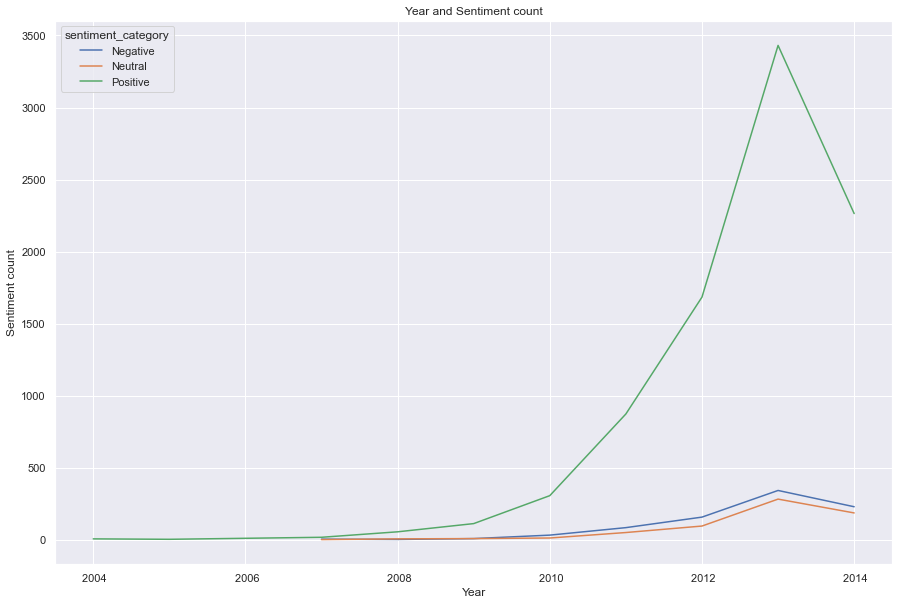

In [80]:
# Year vs Sentiment count
review.groupby(['year','sentiment_category'])['sentiment_category'].count().unstack().plot(figsize = (15,10),legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

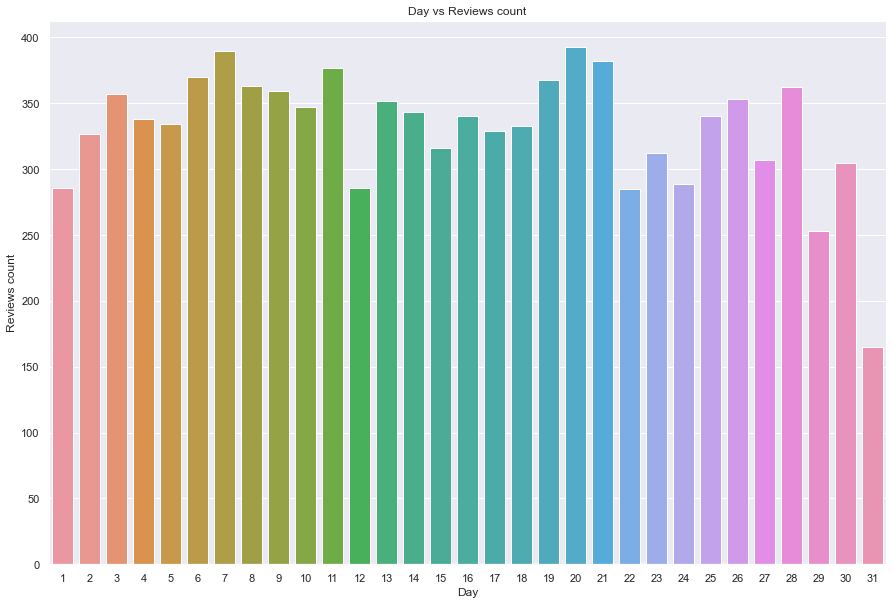

In [81]:
# Day of month vs Reviews count

#Creating a dataframe
day=pd.DataFrame(review.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
sns.set(rc={'figure.figsize':(15, 10)})
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()
